In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("Exam_Score_Prediction.csv")

In [5]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [6]:
df.tail()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


In [7]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [11]:
df.drop('student_id', axis=1, inplace=True)

<Axes: xlabel='exam_score', ylabel='Count'>

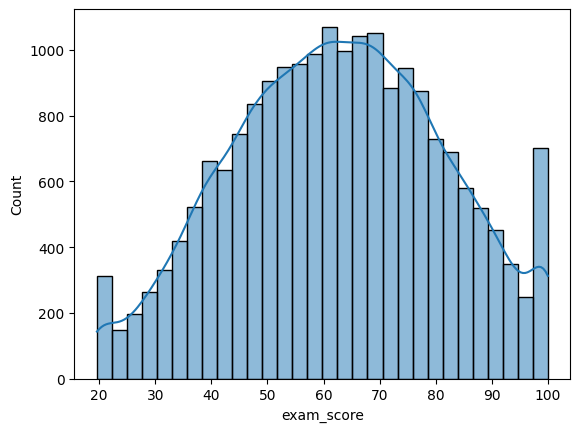

In [12]:
sns.histplot(df['exam_score'] , bins = 30 , kde = True)

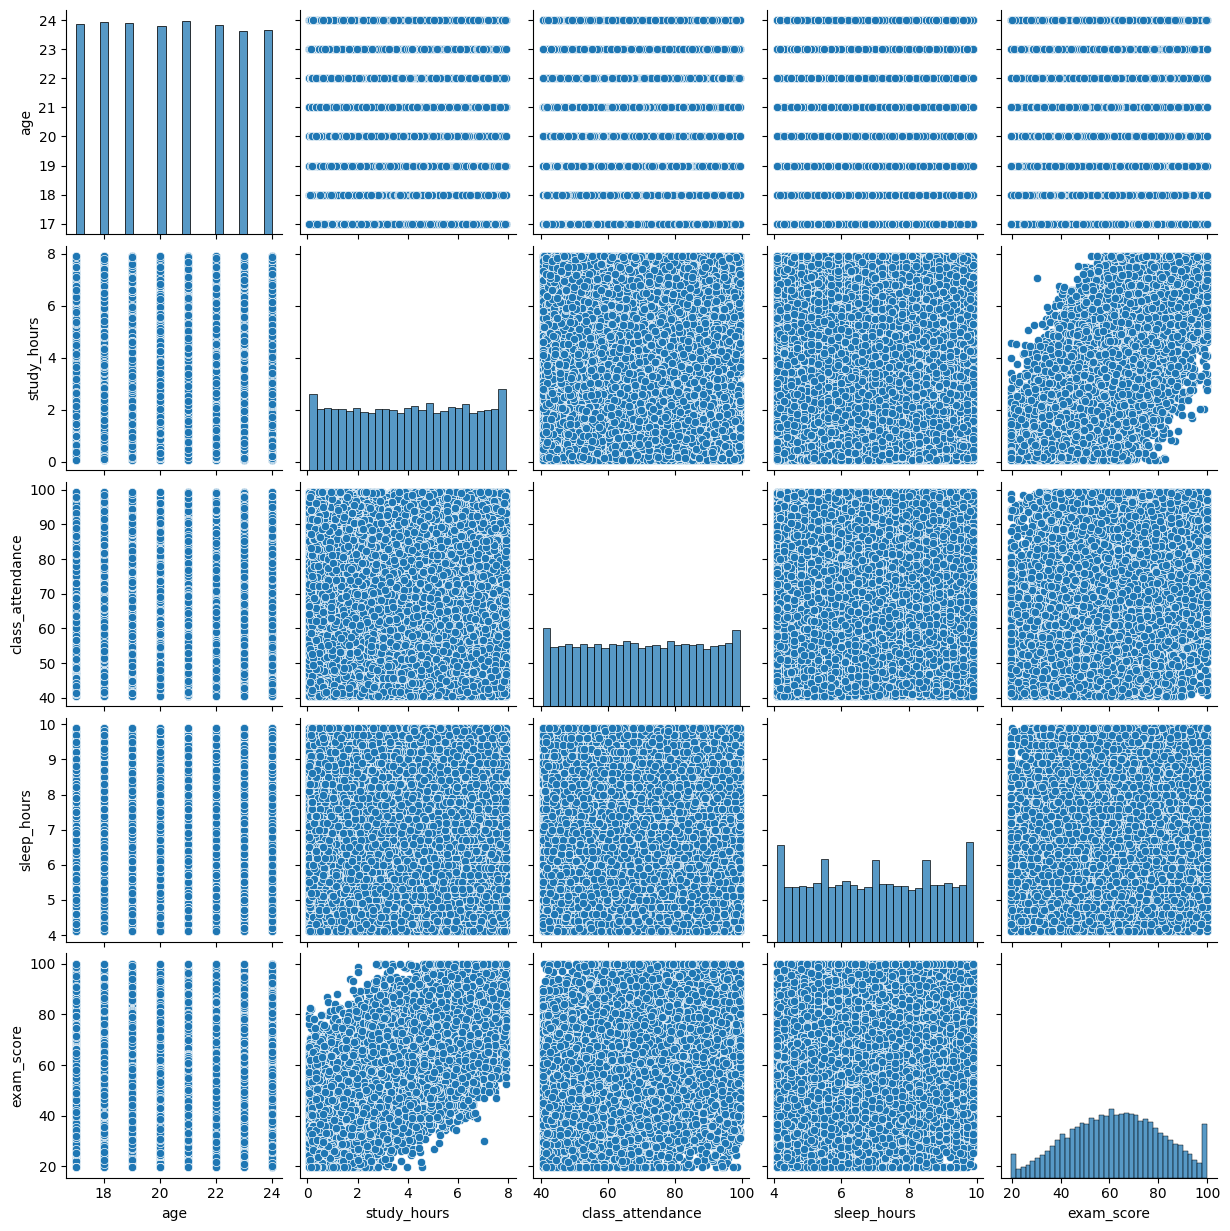

In [13]:
sns.pairplot(df)

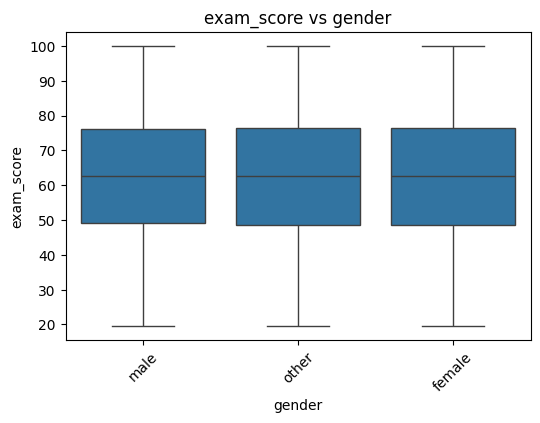

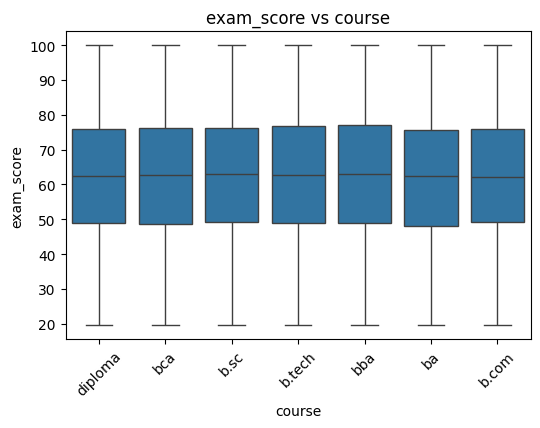

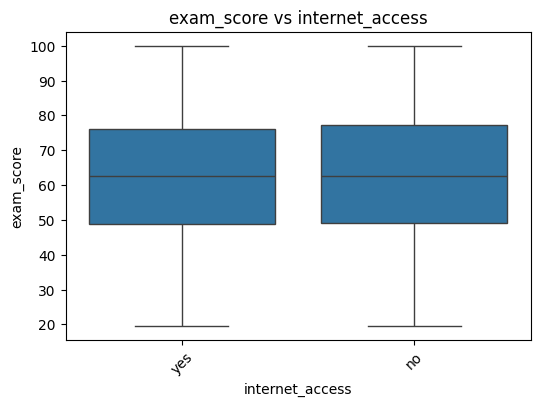

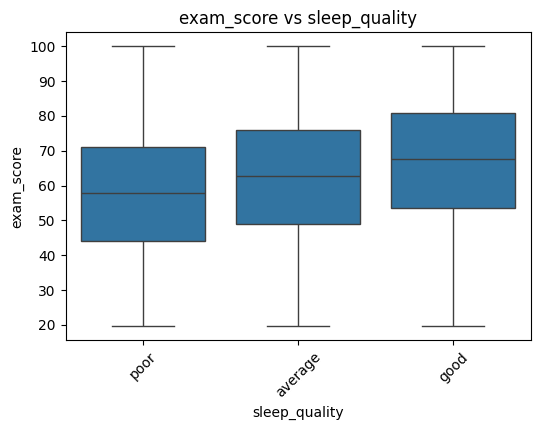

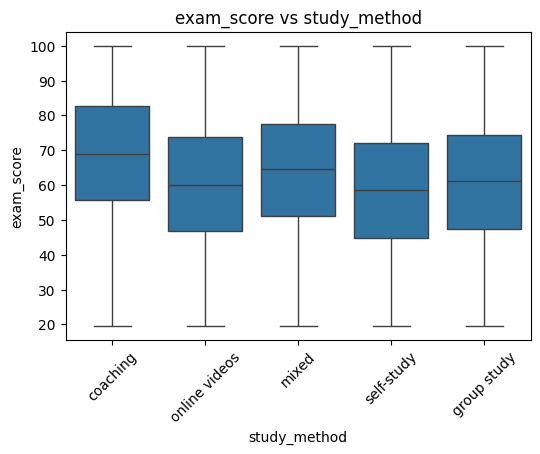

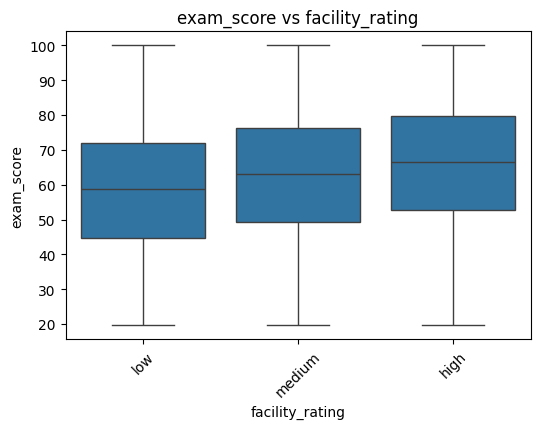

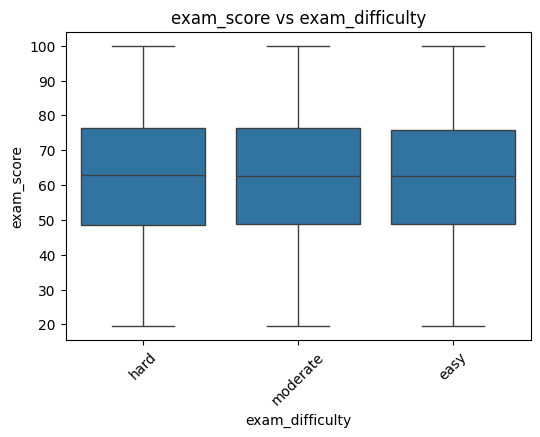

In [14]:
target = 'exam_score'

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y=target, data=df)
    plt.title(f'{target} vs {col}')
    plt.xticks(rotation=45)
    plt.show()


<Axes: >

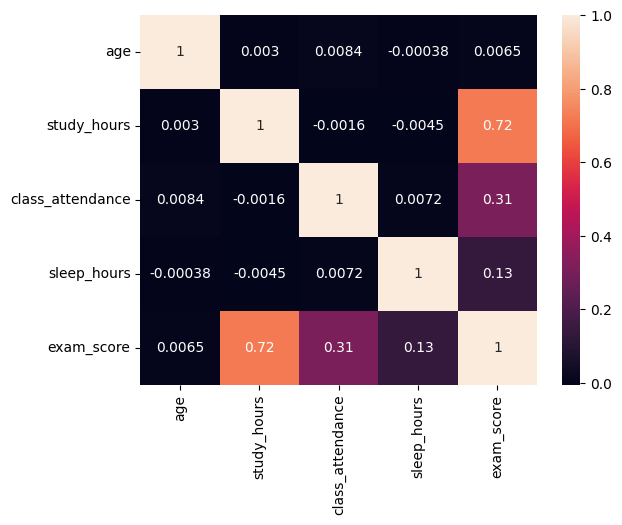

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [16]:
from scipy.stats import shapiro, levene, ttest_ind, f_oneway, mannwhitneyu, kruskal

target = 'exam_score'

# Drop ID column (not useful for testing)
if 'student_id' in df.columns:
    df = df.drop('student_id', axis=1)

cat_cols = df.select_dtypes(include='object').columns

print("===== Statistical Testing Results =====\n")

for col in cat_cols:

    print(f"\nFeature: {col}")
    categories = df[col].unique()
    groups = [df[df[col] == cat][target] for cat in categories]

    # ---- Assumption Testing ----
    # Normality test (Shapiro - sample max 500 for speed)
    normality = [shapiro(group.sample(min(500, len(group))))[1] for group in groups]

    # Variance test (Levene)
    variance_p = levene(*groups)[1]

    # ---- Decide which test to apply ----

    if len(categories) == 2:
        # Two groups

        if all(p > 0.05 for p in normality) and variance_p > 0.05:
            stat, p_value = ttest_ind(groups[0], groups[1])
            test_used = "Independent T-Test"
        else:
            stat, p_value = mannwhitneyu(groups[0], groups[1])
            test_used = "Mann-Whitney U Test"

    else:
        # More than two groups

        if all(p > 0.05 for p in normality) and variance_p > 0.05:
            stat, p_value = f_oneway(*groups)
            test_used = "One-Way ANOVA"
        else:
            stat, p_value = kruskal(*groups)
            test_used = "Kruskal-Wallis Test"

    # ---- Decision ----
    if p_value < 0.05:
        decision = "Reject H0 (Significant Effect)"
    else:
        decision = "Fail to Reject H0 (Not Significant)"

    print(f"Test Used: {test_used}")
    print(f"P-value: {p_value}")
    print(f"Decision: {decision}")


===== Statistical Testing Results =====


Feature: gender
Test Used: Kruskal-Wallis Test
P-value: 0.9316623954237638
Decision: Fail to Reject H0 (Not Significant)

Feature: course
Test Used: Kruskal-Wallis Test
P-value: 0.6126085309610876
Decision: Fail to Reject H0 (Not Significant)

Feature: internet_access
Test Used: Mann-Whitney U Test
P-value: 0.33188289943486615
Decision: Fail to Reject H0 (Not Significant)

Feature: sleep_quality
Test Used: Kruskal-Wallis Test
P-value: 4.23897495984405e-161
Decision: Reject H0 (Significant Effect)

Feature: study_method
Test Used: Kruskal-Wallis Test
P-value: 7.222436800977426e-142
Decision: Reject H0 (Significant Effect)

Feature: facility_rating
Test Used: Kruskal-Wallis Test
P-value: 3.9906257556129517e-107
Decision: Reject H0 (Significant Effect)

Feature: exam_difficulty
Test Used: Kruskal-Wallis Test
P-value: 0.8128729529959196
Decision: Fail to Reject H0 (Not Significant)


# 📊 Statistical Hypothesis Testing Report

## 🎯 Objective
To determine whether categorical variables have a statistically significant impact on students' exam performance.

Target Variable: `exam_score`  
Significance Level (α) = 0.05  

---

## 🧪 Methodology

1. Normality was tested using the Shapiro-Wilk test.
2. Homogeneity of variance was tested using Levene’s test.
3. Based on assumptions:
   - Parametric tests (T-test / ANOVA) were applied when assumptions were satisfied.
   - Non-parametric tests (Mann-Whitney U / Kruskal-Wallis) were applied when assumptions were violated.
4. Decision rule:
   - If p-value < 0.05 → Reject Null Hypothesis (Significant)
   - If p-value ≥ 0.05 → Fail to Reject Null Hypothesis (Not Significant)

---

## ✅ Statistically Significant Variables (p < 0.05)

- **sleep_quality**
- **study_method**
- **facility_rating**

### Interpretation:
There is strong statistical evidence that exam scores vary significantly across categories of these variables.  
These factors play a meaningful role in predicting academic performance.

---

## ❌ Not Statistically Significant Variables (p ≥ 0.05)

- gender
- course
- internet_access
- exam_difficulty

### Interpretation:
There is insufficient statistical evidence to conclude that these variables significantly affect exam scores.

---

## 📌 Key Findings

- Academic behavior and environment-related factors significantly influence exam performance.
- Demographic and exam-level factors showed no statistically significant effect.
- Feature selection for regression modeling should prioritize statistically significant variables.

---

## 🏁 Conclusion

At a 5% significance level, **sleep_quality**, **study_method**, and **facility_rating**
were found to significantly impact exam_score.

These results provide statistical justification for their inclusion
in predictive modeling and academic performance analysis.


#   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64 :❌

 1   age               20000 non-null  int64 ❌

 2   gender            20000 non-null  object ❌

 3   course            20000 non-null  object ❕

 4   study_hours       20000 non-null  float64 ✅

 5   class_attendance  20000 non-null  float64 ✅

 6   internet_access   20000 non-null  object ❌

 7   sleep_hours       20000 non-null  float64 ❌

 8   sleep_quality     20000 non-null  object ✅

 9   study_method      20000 non-null  object ✅

 10  facility_rating   20000 non-null  object ✅

 11  exam_difficulty   20000 non-null  object ❕

 12  exam_score        20000 non-null  float64 🎯









In [17]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le



In [18]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,1,6,2.78,92.9,1,7.4,2,0,1,1,58.9
1,23,2,5,3.37,64.8,1,4.6,0,3,2,2,54.8
2,22,1,1,7.88,76.8,1,8.5,2,0,0,2,90.3
3,20,2,6,0.67,48.4,1,5.8,0,3,1,2,29.7
4,20,0,6,0.89,71.6,1,9.8,2,0,1,2,43.7


In [19]:
x = df.drop(['exam_score','course' ,'internet_access','gender','age'], axis=1)
y = df['exam_score']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
model = dt.fit(x_train, y_train)

In [22]:
model

DecisionTreeRegressor(random_state=42)

In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [25]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("MSE:", mse)
print("MAE:", mae)

R2 Score: 0.3930371385293955
MSE: 218.8907796222727
MAE: 11.740652575757576


In [26]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

In [27]:
model_1 = abr.fit(x_train, y_train)

In [28]:
y_pred_abr = model_1.predict(x_test)

In [29]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("MSE:", mse)
print("MAE:", mae)

R2 Score: 0.3930371385293955
MSE: 218.8907796222727
MAE: 11.740652575757576


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor()

In [31]:
model_2 = gdb.fit(x_train, y_train)

In [32]:
y_pred_gdb = model_2.predict(x_test)

In [33]:
y_pred_gdb

array([35.61924448, 76.4454768 , 56.58477342, ..., 71.00628059,
       54.09832508, 62.03046879])

In [34]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("MSE:", mse)
print("MAE:", mae)

R2 Score: 0.3930371385293955
MSE: 218.8907796222727
MAE: 11.740652575757576


In [35]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)

model_3 = xgb_reg.fit(x_train, y_train)

y_pred_xgb = model_3.predict(x_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Regressor Metrics")
print(f"R2 Score: {r2_xgb}")
print(f"MSE: {mse_xgb}")
print(f"MAE: {mae_xgb}")

XGBoost Regressor Metrics
R2 Score: 0.6976231066199827
MSE: 109.04705729663216
MAE: 8.38689953414917


In [36]:
from sklearn.model_selection import RandomizedSearchCV


xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist'   # faster training
)

param_dist = {
    'n_estimators': np.arange(200, 1000, 100),
    'learning_rate': np.linspace(0.01, 0.15, 10),
    'max_depth': np.arange(3, 10),
    'min_child_weight': [1, 3, 5, 7],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'gamma': np.linspace(0, 0.5, 6),
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0.1, 1, 5, 10, 20]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,        # increase iterations
    cv=5,             # stronger validation
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': np.float64(0.6), 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': np.int64(500), 'min_child_weight': 7, 'max_depth': np.int64(3), 'learning_rate': np.float64(0.041111111111111105), 'gamma': np.float64(0.2), 'colsample_bytree': np.float64(0.7)}


In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


y_pred = best_model.predict(x_test)

print("Test R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


Test R2 Score: 0.7313291119506792
MSE: 96.89156269699107
RMSE: 9.843351192403484
MAE: 7.9244668977795225


# Task
Save the trained XGBoost model (`best_model`) and the fitted LabelEncoders (`encoders`) to `.pkl` files.

## Save the trained XGBoost model

### Subtask:
Save the 'best_model' (trained XGBoost Regressor) to a .pkl file using the pickle library.


**Reasoning**:
I need to save the trained XGBoost model (`best_model`) to a .pkl file using the `pickle` library, following the instructions provided.



In [38]:
import pickle

# Save the best_model to a .pkl file
with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model 'best_xgboost_model.pkl' saved successfully.")

Model 'best_xgboost_model.pkl' saved successfully.


## Save the fitted LabelEncoders

### Subtask:
Save the `encoders` dictionary (containing all fitted LabelEncoders) to a .pkl file using the pickle library.

**Reasoning**:
To save the `encoders` dictionary to a `.pkl` file, I will use the `pickle` library, opening a file in write-binary mode and dumping the dictionary into it.



In [39]:
import pickle

# Save the encoders dictionary to a .pkl file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

print("LabelEncoders 'label_encoders.pkl' saved successfully.")

LabelEncoders 'label_encoders.pkl' saved successfully.


## Summary:

### Data Analysis Key Findings
*   The trained XGBoost Regressor model was successfully saved to a file named `best_xgboost_model.pkl`.
*   The dictionary containing all fitted LabelEncoders was successfully saved to a file named `label_encoders.pkl`.

### Insights or Next Steps
*   The saved model and encoders can now be easily loaded for future predictions or further analysis without needing to retrain or refit.
*   The `.pkl` files provide a persistent storage mechanism, ensuring reproducibility and efficient deployment of the trained machine learning pipeline.
